In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('/content/drive/MyDrive/CSE1015_ML/Project/Litecoin Historical Data - Investing.com India.csv', parse_dates=[0], index_col=0)
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-03-15,106.8,105.5,108.6,102.5,48.10M,1.04%
2022-03-14,105.7,101.7,106.2,100.9,48.11M,3.93%
2022-03-13,101.7,105.5,107.3,101.1,27.99M,-3.60%
2022-03-12,105.5,104.6,108.0,104.6,29.05M,0.86%
2022-03-11,104.6,102.6,106.8,99.9,47.91M,1.95%


In [3]:
df.sort_index(axis=0, inplace=True)

In [4]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-08-24,3.84,3.95,3.96,3.61,21.86K,-2.78%
2016-08-25,3.81,3.84,3.88,3.75,21.87K,-0.78%
2016-08-26,3.81,3.81,3.90,3.77,14.35K,0.00%
2016-08-27,3.78,3.81,3.85,3.62,4.91K,-0.79%
2016-08-28,3.72,3.78,3.78,3.62,8.19K,-1.59%
...,...,...,...,...,...,...
2022-03-11,104.60,102.60,106.80,99.90,47.91M,1.95%
2022-03-12,105.50,104.60,108.00,104.60,29.05M,0.86%
2022-03-13,101.70,105.50,107.30,101.10,27.99M,-3.60%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2030 entries, 2016-08-24 to 2022-03-15
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2030 non-null   float64
 1   Open      2030 non-null   float64
 2   High      2030 non-null   float64
 3   Low       2030 non-null   float64
 4   Vol.      2030 non-null   object 
 5   Change %  2030 non-null   object 
dtypes: float64(4), object(2)
memory usage: 111.0+ KB


In [6]:
df.describe()

,Price,Open,High,Low
count,2030.000000,2030.000000,2030.000000,2030.000000
mean,88.627811,88.586506,92.567664,84.194337
std,69.419570,69.473727,73.438911,64.955523
min,3.500000,3.510000,3.580000,3.260000
25%,43.461500,43.447000,44.609250,42.100000
50%,61.489500,61.457000,63.555500,59.148500
75%,133.481000,133.479500,138.084500,127.348000
max,386.820000,387.812000,420.000000,345.199000


In [7]:
def format_data(num):
    nums = num.split(',');
    if(len(nums) == 2):
        n = float(nums[0] + nums[1])
    else:
        n = float(nums[0])
    return n

In [8]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [9]:
from collections import Counter

arr=[]

for i in df["Vol."]:
  arr.append(i[-1])

Counter(arr).keys()

dict_keys(['K', 'M'])

In [10]:
def format_vol(x):
    if(x[-1] == 'K'):
        n = float(x[:-1]) * 1000
    elif(x[-1] == 'M'):
        n = float(x[:-1]) * 1000000
    elif(x == '-'):
        n = 0
    return n

In [11]:
df['Vol.'] = df['Vol.'].apply(format_vol)

In [12]:
def formate_change(x):
    n = float(x[:-1])
    return n

df['Change %'] = df['Change %'].apply(formate_change)

In [13]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-08-24,3.84,3.95,3.96,3.61,21860.0,-2.78
2016-08-25,3.81,3.84,3.88,3.75,21870.0,-0.78
2016-08-26,3.81,3.81,3.90,3.77,14350.0,0.00
2016-08-27,3.78,3.81,3.85,3.62,4910.0,-0.79
2016-08-28,3.72,3.78,3.78,3.62,8190.0,-1.59


In [14]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2030 entries, 2016-08-24 to 2022-03-15
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2030 non-null   float64
 1   Open      2030 non-null   float64
 2   High      2030 non-null   float64
 3   Low       2030 non-null   float64
 4   Vol.      2030 non-null   float64
 5   Change %  2030 non-null   float64
dtypes: float64(6)
memory usage: 111.0 KB


## Resampling Data
### A - Year, M - Month End, W - Weekly, D - Daily, MS - Month Start

In [16]:
monthly_df = df['Open'].resample('MS').mean()

## Visualizations

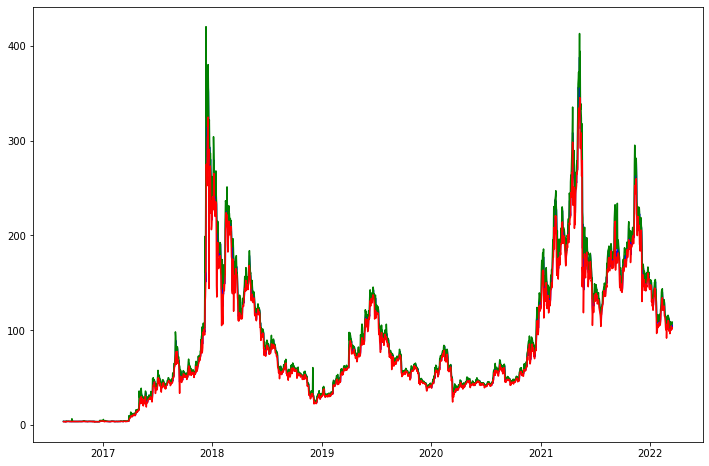

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(df['Open'], color='blue')
plt.plot(df['High'], color='green')
plt.plot(df['Low'], color='red')

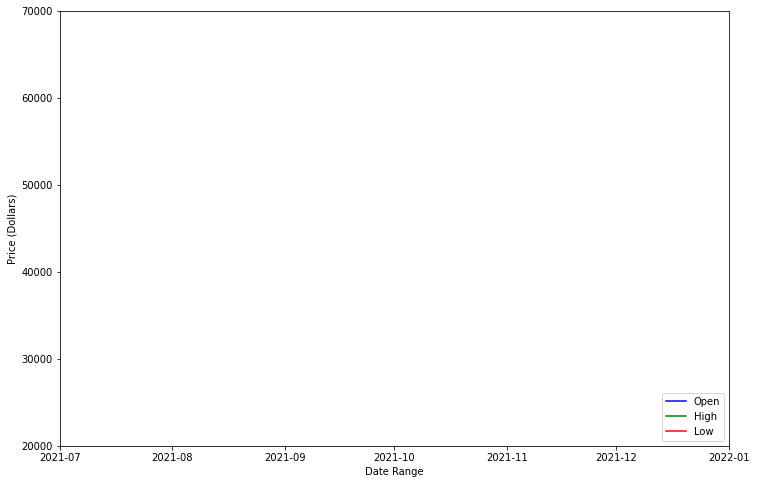

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(df['Open'], color='blue', label="Open")
plt.plot(df['High'], color='green', label="High")
plt.plot(df['Low'], color='red', label="Low")
plt.xlim(datetime.date(2021, 7, 1), datetime.date(2022, 1, 1))
plt.ylim(20000,70000)
plt.xlabel("Date Range")
plt.ylabel("Price (Dollars)")
plt.legend(loc="lower right")

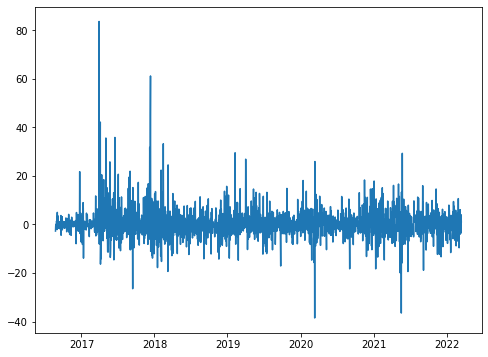

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(df['Change %'])

Text(0, 0.5, 'Open cost')

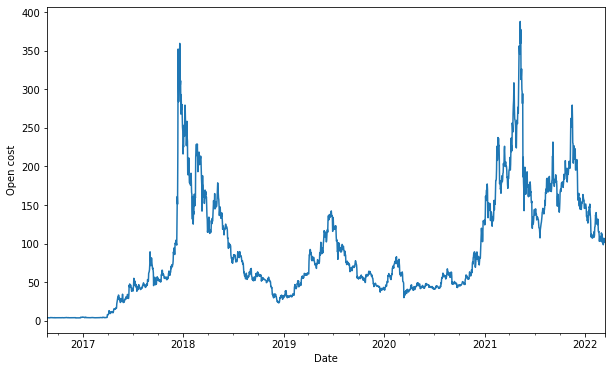

In [20]:
plt.figure(figsize=(10, 6))
df['Open'].plot()
plt.ylabel('Open cost')

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


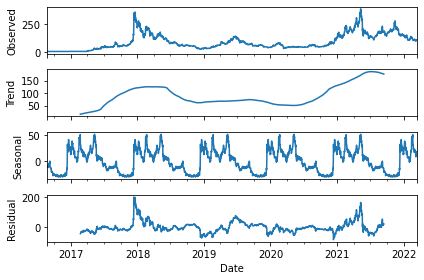

In [22]:
decomposition = seasonal_decompose(df['Open'], model='additive', freq=365)
fig = decomposition.plot()
plt.show()

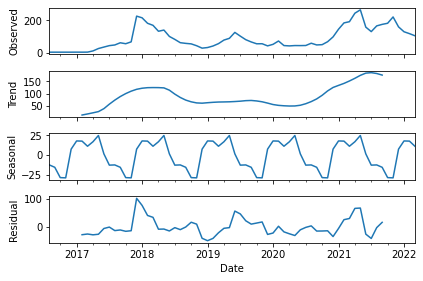

In [23]:
decomposition = seasonal_decompose(monthly_df, model='additive')
fig = decomposition.plot()
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
# h0: It is non stationary
# h1: It is stationary

def adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used']
    for value, label in zip(result, labels):
        print(label+" : "+str(value))
    if result[1] <= 0.05:
        print("String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

In [26]:
adfuller_test(df['Open'])

ADF Test Statistic : -2.599264242011732
p-value : 0.09314942902239304
#Lags Used : 13
Number of observations Used : 2016
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [27]:
adfuller_test(monthly_df)

ADF Test Statistic : -2.492246195444904
p-value : 0.11737232579643747
#Lags Used : 1
Number of observations Used : 66
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


## Making Stationary

In [28]:
p_values = []
for i in range(1, 62):
    tdf = df['Open'].diff(periods=i)
    res = adfuller(tdf.dropna())
    p_values.append([i, res[1]])
p_values.sort(key = lambda x: x[1])
p_values[:10]

[[1, 3.0997862120546377e-26],
 [27, 2.6674528940478026e-19],
 [28, 2.7652971692988253e-18],
 [29, 3.060962278303867e-17],
 [30, 3.6827949204580226e-17],
 [31, 2.958473622327544e-16],
 [14, 3.777216560198588e-15],
 [33, 1.268580354589208e-14],
 [3, 2.012533650851099e-14],
 [32, 2.893706008346051e-14]]

In [29]:
rate_diff = df['Open'].diff(periods=27)
rate_diff.dropna(inplace=True)
rate_diff

Date
2016-09-20    -0.09
2016-09-21     0.16
2016-09-22    -0.05
2016-09-23    -0.02
2016-09-24     0.05
              ...  
2022-03-11   -23.20
2022-03-12   -22.10
2022-03-13   -20.10
2022-03-14   -22.80
2022-03-15   -26.20
Name: Open, Length: 2003, dtype: float64

In [30]:
adfuller_test(rate_diff)

ADF Test Statistic : -10.75087033291163
p-value : 2.6674528940478026e-19
#Lags Used : 26
Number of observations Used : 1976
String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.


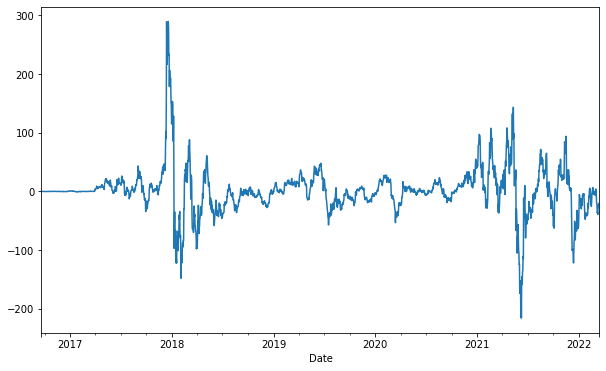

In [31]:
plt.figure(figsize=(10, 6))
rate_diff.plot()

In [32]:
p_values = []
for i in range(1, 12):
    tdf = monthly_df.diff(periods=i)
    res = adfuller(tdf.dropna())
    p_values.append([i, res[1]])
p_values.sort(key = lambda x: x[1])
p_values

[[1, 9.603516868538158e-10],
 [3, 1.621147685977967e-05],
 [2, 0.01574145154010389],
 [5, 0.018177551482100745],
 [4, 0.03838813486584372],
 [8, 0.05969593095709218],
 [6, 0.07883064074751045],
 [7, 0.16912942024454536],
 [9, 0.24026687038654443],
 [10, 0.290693600820611],
 [11, 0.5504658897903613]]

In [33]:
seasonal_monthly_df = monthly_df.diff(periods=9)
seasonal_monthly_df

Date
2016-08-01           NaN
2016-09-01           NaN
2016-10-01           NaN
2016-11-01           NaN
2016-12-01           NaN
                 ...    
2021-11-01     36.849286
2021-12-01    -31.998516
2022-01-01   -114.633122
2022-02-01   -147.257456
2022-03-01    -53.338867
Freq: MS, Name: Open, Length: 68, dtype: float64

In [34]:
adfuller_test(seasonal_monthly_df.dropna())


ADF Test Statistic : -2.1106171721673825
p-value : 0.24026687038654443
#Lags Used : 9
Number of observations Used : 49
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


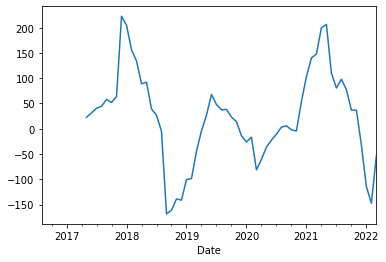

In [35]:
seasonal_monthly_df.plot()


## Visulizing PACF and ACF Plots

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

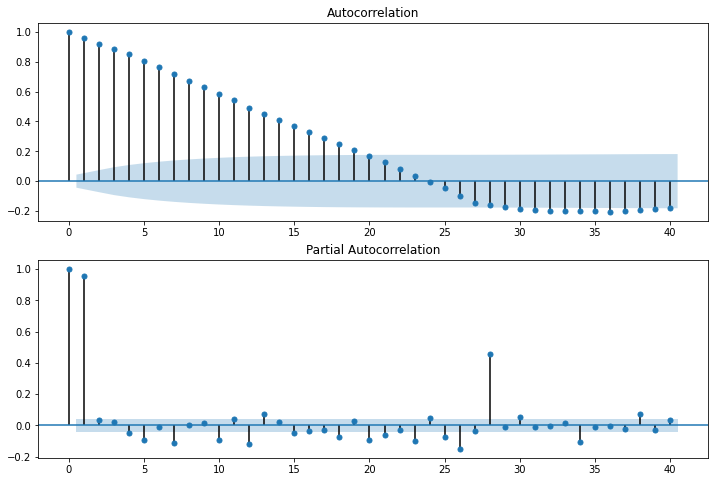

In [37]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(rate_diff.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(rate_diff.dropna(), lags=40, ax=ax2)

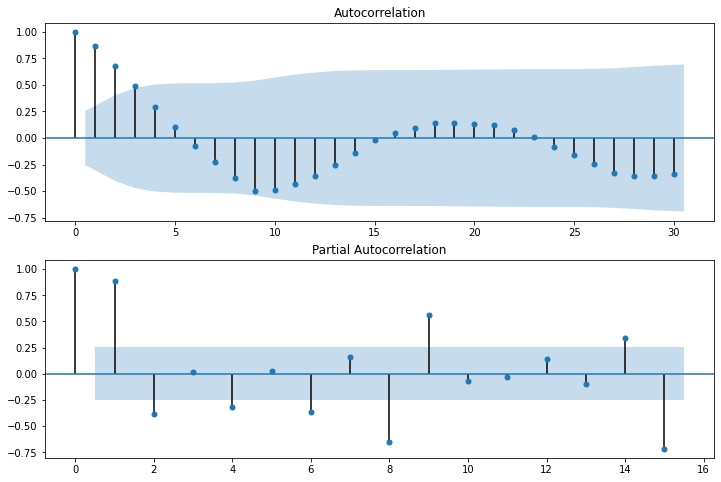

In [38]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(seasonal_monthly_df.dropna(), lags=30, ax=ax1)
#Here lags are basically the number of time  periods we skip to observe correlation in our data.
ax2 = fig.add_subplot(212)
fig = plot_pacf(seasonal_monthly_df.dropna(), lags=15, ax=ax2)

## Modelling


In [39]:
# Spliting the data into training and testing
X = df['Open']
print("Total Length of data:",len(X))
print("93% of data will be:", len(X)*0.93)
train_limit = int(len(X)*0.93)

Total Length of data: 2030
93% of data will be: 1887.9


In [40]:
train_x = X[:train_limit]
test_x = X[train_limit:]

In [41]:
test_x

Date
2021-10-24    196.350
2021-10-25    190.441
2021-10-26    195.430
2021-10-27    197.549
2021-10-28    179.742
               ...   
2022-03-11    102.600
2022-03-12    104.600
2022-03-13    105.500
2022-03-14    101.700
2022-03-15    105.500
Name: Open, Length: 143, dtype: float64

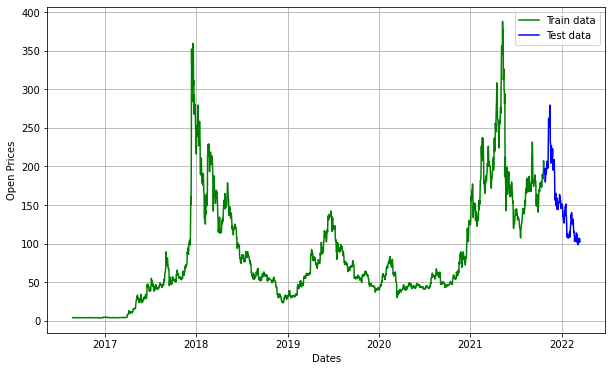

In [42]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Open Prices")
plt.plot(train_x, 'green', label='Train data')
plt.plot(test_x, 'blue', label='Test data')
plt.legend()

## ARIMA Model

In [43]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [78]:
model_arima = ARIMA(train_x, order=(3, 1, 0))
model_arima_fit = model_arima.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [79]:
arima_pred = model_arima_fit.predict(start=train_limit, end=len(X)-1)

In [80]:
arima_pred_df = pd.DataFrame(arima_pred)
arima_pred_df = arima_pred_df.set_index(test_x.index)
arima_pred_df

,0
Date,
2021-10-24,0.896321
2021-10-25,-0.067036
2021-10-26,-0.035733
2021-10-27,0.124533
2021-10-28,0.097147
...,...
2022-03-11,0.099462
2022-03-12,0.099462
2022-03-13,0.099462


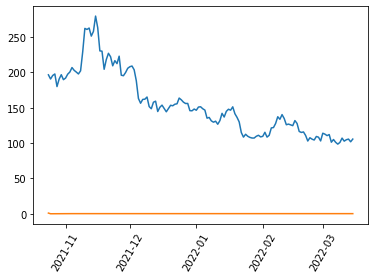

In [81]:
plt.plot(test_x)
plt.plot(arima_pred_df)
plt.xticks(rotation=60)
# plt.xlim(datetime.date(2021, 1, 1), datetime.date(2021, 5, 1))
plt.show()

In [82]:
monthly_train_len = len(monthly_df)*0.9
monthly_train_len

61.2

In [83]:
monthly_df.index[64]

Timestamp('2021-12-01 00:00:00', freq='MS')

In [84]:
train_monthly = monthly_df[:int(monthly_train_len)]
test_monthly = monthly_df[int(monthly_train_len):]

In [85]:
model_monthly = ARIMA(train_monthly, order=(4, 1, 0) )
model_arima_fit = model_arima.fit()

ValueError: ignored

In [86]:
train_monthly.describe()

count     61.000000
mean      79.992705
std       65.285538
min        3.811250
25%       42.860065
50%       56.668484
75%      103.143290
max      265.796742
Name: Open, dtype: float64

In [88]:
arima_pred_monthly = model_arima_fit.predict(start=int(monthly_train_len), end=len(monthly_df)-1)

In [89]:
arima_pred_monthly_df = pd.DataFrame(arima_pred_monthly)
arima_pred_monthly_df.set_index(test_monthly.index, inplace=True)
arima_pred_monthly_df

,0
Date,
2021-09-01,0.100272
2021-10-01,0.099753
2021-11-01,0.101403
2021-12-01,0.101880
2022-01-01,0.100317
2022-02-01,0.098628
2022-03-01,0.102274


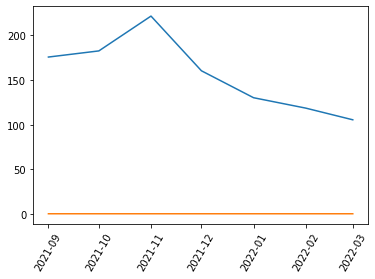

In [90]:
plt.plot(test_monthly)
plt.plot(arima_pred_monthly_df)
plt.xticks(rotation=60)
# plt.xlim(datetime.date(2016, 5, 13), datetime.date(2016, 5, 20))
plt.show()

## ARIMA Model with updating train with current data

In [91]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [92]:
training_data = list(train_x)
testing_data = list(test_x)

In [93]:
model_predictions = []
n_test_obser = len(testing_data)

In [94]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (3,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = list(output[0])[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [95]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2028
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -7135.012
Method:                       css-mle   S.D. of innovations              8.161
Date:                Sat, 09 Apr 2022   AIC                          14280.024
Time:                        07:08:32   BIC                          14308.098
Sample:                             1   HQIC                         14290.325
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0483      0.176      0.274      0.784      -0.298       0.394
ar.L1.D.y     -0.0274      0.022     -1.233      0.218      -0.071       0.016
ar.L2.D.y     -0.0216      0.022     -0.972      0.3

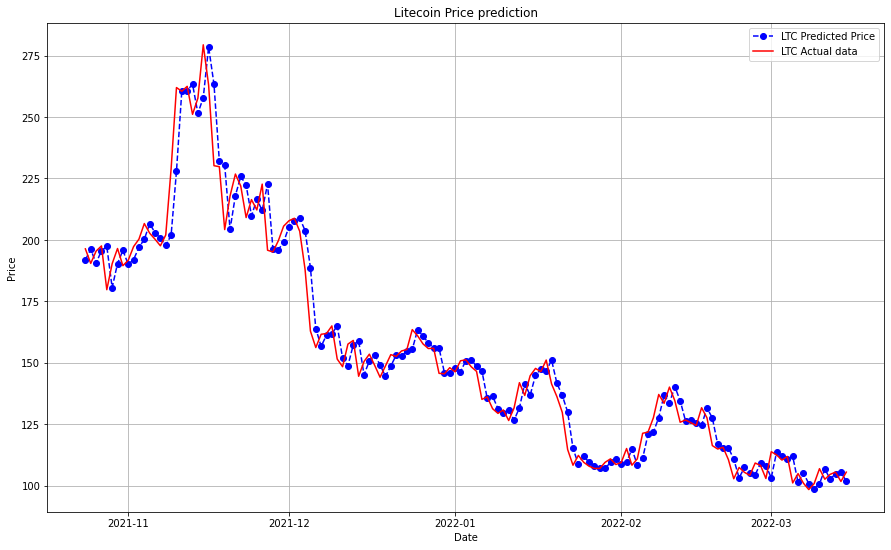

In [96]:
plt.figure(figsize=(15, 9))
plt.grid()

date_range = df[train_limit:].index
plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label="LTC Predicted Price")
plt.plot(date_range, testing_data, color='red', label='LTC Actual data')

plt.title('Litecoin Price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [97]:
# Mean absolute percentage error
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print("MAPE:", mape)

MAPE: 0.037324475658934674


In [98]:
mean_squared_error(testing_data, model_predictions)

74.74432114210867

In [99]:
np.mean(testing_data)

154.50927272727273

## SARIMA

In [100]:
import statsmodels.api as sm

In [66]:
sarima_model_daily = sm.tsa.statespace.SARIMAX(train_x, order=(2, 1, 0), seasonal_order=(2, 1, 0, 3))
result_daily = sarima_model_daily.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


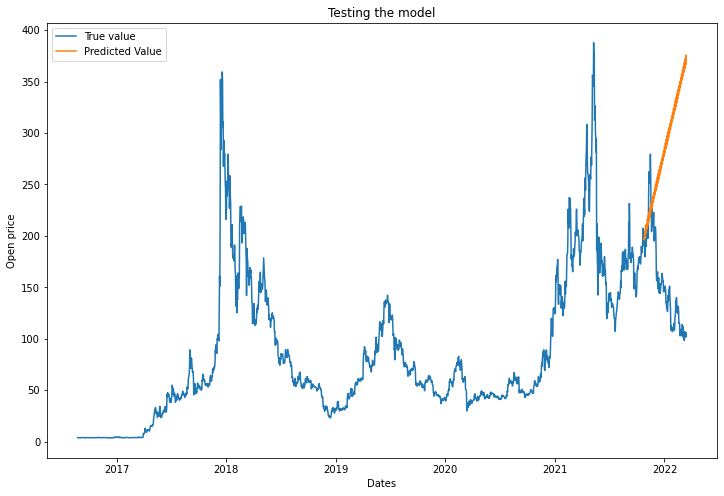

In [67]:
plt.figure(figsize=(12, 8))
daily_prediction = result_daily.predict(start=train_limit, end=len(X)-1)
plt.plot(X.index, X, label="True value")
plt.plot(daily_prediction, label="Predicted Value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Testing the model")
plt.legend()

In [68]:
sarima_model_daily = sm.tsa.statespace.SARIMAX(df['Open'], order=(2, 1, 0), seasonal_order=(2, 1, 0, 3))
result_daily = sarima_model_daily.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


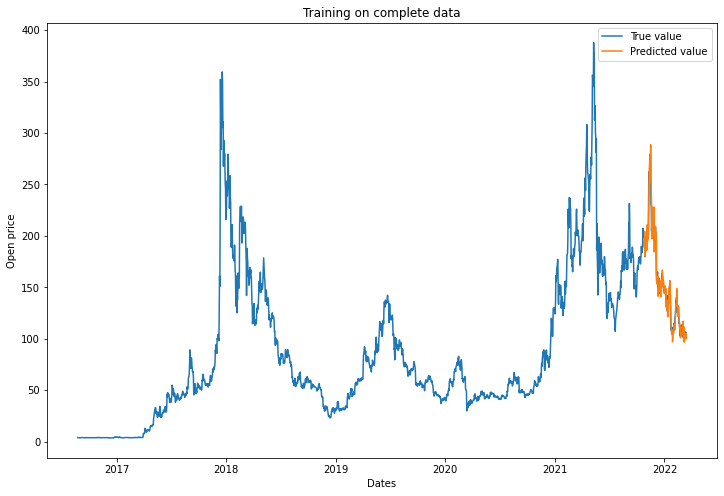

In [69]:
plt.figure(figsize=(12, 8))
daily_prediction = result_daily.predict(start=train_limit, end=len(X)-1)
plt.plot(X.index, X, label="True value")
plt.plot(daily_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Training on complete data")
plt.legend()

In [70]:
X_monthly = monthly_df
print("Total Length of data:",len(X_monthly))
print("90% of data will be:", len(X_monthly)*0.9)
train_limit_monthly = int(len(X_monthly)*0.9)

Total Length of data: 68
90% of data will be: 61.2


In [71]:
train_x_monthly = X_monthly[:train_limit_monthly]
test_x_monthly = X_monthly[train_limit_monthly:]

In [72]:
sarima_model_monthly = sm.tsa.statespace.SARIMAX(train_x_monthly, order=(2, 1, 0), seasonal_order=(1, 1, 0, 6))
result_monthly = sarima_model_monthly.fit()

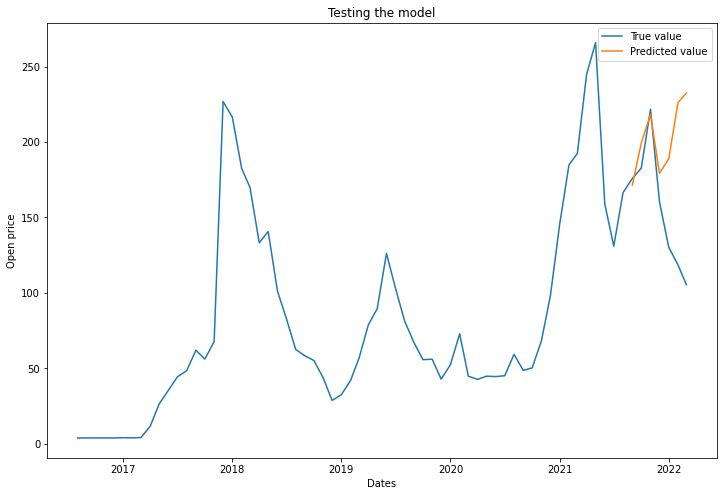

In [73]:
plt.figure(figsize=(12, 8))
monthly_prediction = result_monthly.predict(start=train_limit_monthly, end=len(X_monthly)-1)
plt.plot(X_monthly.index, X_monthly, label="True value")
plt.plot(monthly_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Testing the model")
plt.legend()

In [74]:
sarima_model_monthly = sm.tsa.statespace.SARIMAX(monthly_df, order=(2, 1, 0), seasonal_order=(1, 1, 0, 6))
result_monthly = sarima_model_monthly.fit()

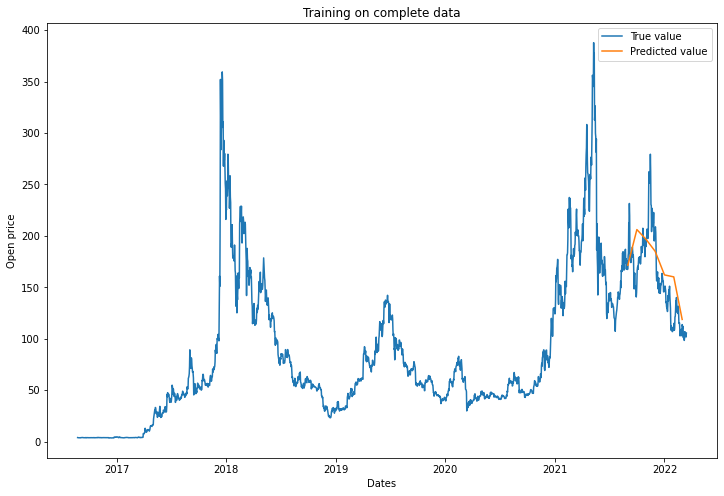

In [75]:
plt.figure(figsize=(12, 8))
monthly_prediction = result_monthly.predict(start=train_limit_monthly, end=len(X_monthly)-1)
plt.plot(X.index, X, label="True value")
plt.plot(monthly_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Training on complete data")
plt.legend()

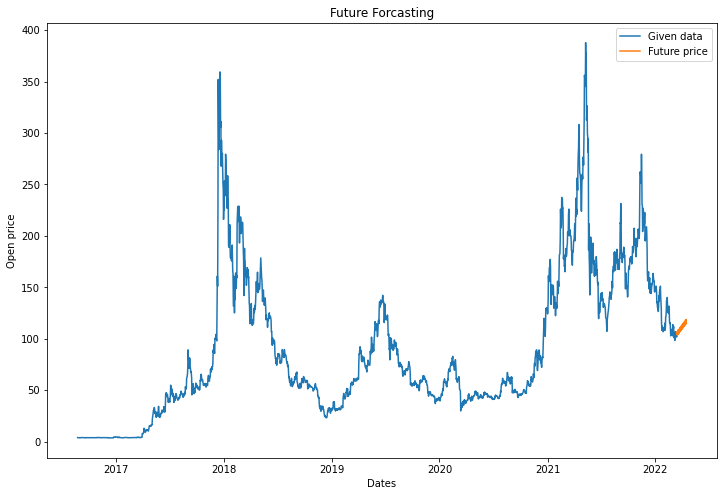

In [76]:
plt.figure(figsize=(12, 8))
future_pred = result_daily.predict(start=len(X)-1, end=len(X)+31)
plt.plot(X.index, X, label="Given data")
plt.plot(future_pred, label="Future price")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Future Forcasting")
plt.legend()

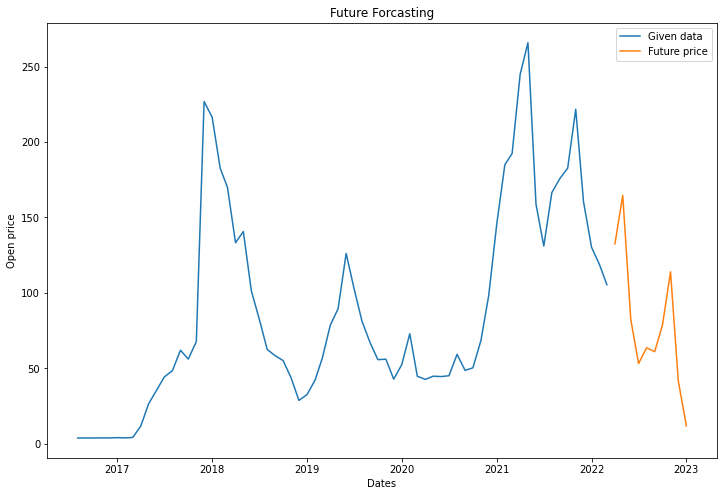

In [77]:
plt.figure(figsize=(12, 8))
future_pred_monthly = result_monthly.predict(start=len(X_monthly), end=len(X_monthly)+9)
plt.plot(X_monthly.index, X_monthly, label="Given data")
plt.plot(future_pred_monthly, label="Future price")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Future Forcasting")
plt.legend()